Suppose that q = 13. Let L be a line in $P^2_{F_q}$
defined by
2x + 3y + 5z = 0.
List all the points in the line L.


In [1]:
points = []
q = 13
# z ！= 0
for x in range(q):
    for y in range(q):
            if (2 * x + 3 * y + 5 * 1) % q == 0:
                points.append([x, y, 1])
# z = 0 and y ！= 0
for x in range(q):
    if (2 * x + 3) % q == 0:
        points.append([x, 1, 0])
# y = 0, z = 0
if (2 * 1) % q == 0:
    points.append([1, 0, 0])

print(points)
print(len((points)))

[[0, 7, 1], [1, 2, 1], [2, 10, 1], [3, 5, 1], [4, 0, 1], [5, 8, 1], [6, 3, 1], [7, 11, 1], [8, 6, 1], [9, 1, 1], [10, 9, 1], [11, 4, 1], [12, 12, 1], [5, 1, 0]]
14


Exercise 2.65. Suppose that q = 1973. Let L1 be the line in $ P^2_{F_q}$
given by $389x+97y+1291z = 0$, and let L2 be the line in $P^2_{F_q}$
given by $137x+1303y+199z =0 $. Find L1 ∩ L2.

In [2]:
from sympy import *
i, j, k = symbols('i, j, k')
p = 1973
M = Matrix([[389, 97, 1291],
[137, 1303, 199],
[i, j, k]])
determinant = Poly(M.det(), i, j, k)
a = determinant.coeff_monomial(i)%p
b = determinant.coeff_monomial(j)%p
c = determinant.coeff_monomial(k)%p
P = [a, b, c]
print(P)


[369, 806, 328]


In [3]:
from sympy import *
x, y, z = symbols('x, y, z')
p = 1973
def inverse(a,p):
    for x in range(0, p):
        if ((x * a)%p == 1):
            return x
a = inverse(328,p)
print(a)
P = [a * 369%p, a * 806%p, a * 328%p]
print(P)


788
[741, 1795, 1]


Exercise 2.66. Suppose that q = 37. Find the line in $P^2_{F_q}$
containing [3 : 5 : 7] and [7 : 5 : 3].


In [4]:
x, y, z = symbols('x, y, z')
p = 37
M = Matrix([[389, 97, 1291],
            [137, 1303, 199],
            [x, y, z]])
determinant = Poly(M.det(), x , y, z)
print(determinant)
a = determinant.coeff_monomial(x)%q
b = determinant.coeff_monomial(y)%p
c = determinant.coeff_monomial(z)%p 
print ('%d*x + %d*y + %d*z' % (a, b, c))

Poly(-1662870*x + 99456*y + 493578*z, x, y, z, domain='ZZ')
12*x + 0*y + 35*z


Exercise 2.67. Let Σ be the subset in $P^2_{F_q}$
consisting of the points
[1 : 2 : 3], [37 : 379 : 17], [1973 : 23 : 73], [11 : 13 : 5], [43 : 257 : 61], [269 : 53 : 29], [19 : 877 : 3],
where q = 9871.

In [5]:
P1 = [1 , 2 , 3]
P2 = [37 , 379 , 17]
P3 = [1973 , 23 , 73]
P4 = [11 , 13 , 5]
P5 = [43 , 257 , 61]
P6 = [269 , 53 , 29]
P7 = [19 , 877 , 3]
points = [P1, P2, P3, P4, P5, P6, P7]
q = 9871
colinear = []
import itertools 
for p1, p2, p3 in itertools.combinations(points, 3):
    M = Matrix([p1, p2, p3])
    if M.det() % q == 0:
        colinear.append[p1, p2, p3]
print(colinear)

[]


Exercise 2.72. Suppose that q = 2063. Find projective transformation φ: $P^2_{F_q}$
such that

φ[37 : 379 : 17]  = [1 : 0 : 0],
φ[1973 : 23 : 73] = [0 : 1 : 0],
φ[11 : 13 : 5]    = [0 : 0 : 1],
φ[43 : 257 : 61]  = [1 : 1 : 1].

use inv_mod find F = [x,y,z].T.inv_mod(p) then find G: s.t. φ[43 : 257 : 61]  = [1 : 1 : 1].  the composition G*F is the operator we need!
note in projective space we have [a : 0 ：0] = [1 : 0 : 0] for a != 0

In [6]:
from sympy import *

p=2063
x = [37 , 379 , 17]
y = [1973 , 23 , 73]
z = [11 , 13 , 5]
u = [43 , 257 , 61]
M = Matrix([x,y,z]).T
print(M)
U = Matrix(3,1,u)
A = M.inv_mod(p)
#B=np.array(A).astype(np.float64)
c0 = (A * U).tolist()
C = Matrix.diag(c0).inv_mod(p)
C = (C*A) % p
print(C)
print(444*1330*65%p)
print(C*M % p)
print(C*U % p)

Matrix([[37, 1973, 11], [379, 23, 13], [17, 73, 5]])
Matrix([[1769, 1258, 1502], [682, 1911, 1783], [1108, 1673, 1065]])
1685
Matrix([[444, 0, 0], [0, 1330, 0], [0, 0, 65]])
Matrix([[1], [1], [1]])


using the linear equations system to solve this problem

In [7]:
a11, a12, a13, a21, a22, a23, a31, a32, a33, a, b, c, d = symbols('a11, a12, a13, a21, a22, a23, a31, a32, a33, a, b, c, d')
E11 = (a11 * x[0] + a12 * x[1] + a13 * x[2]) % p - 444
E21 = (a21 * x[0] + a22 * x[1] + a23 * x[2]) % p
E31 = (a31 * x[0] + a32 * x[1] + a33 * x[2]) % p
E12 = (a11 * y[0] + a12 * y[1] + a13 * y[2]) % p
E22 = (a21 * y[0] + a22 * y[1] + a23 * y[2]) % p - 1330
E32 = (a31 * y[0] + a32 * y[1] + a33 * y[2]) % p
E13 = (a11 * z[0] + a12 * z[1] + a13 * z[2]) % p
E23 = (a21 * z[0] + a22 * z[1] + a23 * z[2]) % p
E33 = (a31 * z[0] + a32 * z[1] + a33 * z[2]) % p - 65
E41 = (a11 * u[0] + a12 * u[1] + a13 * u[2]) % p - 1
E42 = (a21 * u[0] + a22 * u[1] + a23 * u[2]) % p - 1
E43 = (a31 * u[0] + a32 * u[1] + a33 * u[2]) % p - 1

equations = (E11, E12, E13, E21, E22, E23, E31, E32, E33, E41, E42, E43)
print(simplify(E11.subs(a11, 1769).subs(a12,1258).subs(a13,1502).subs(a, 444)))
print(simplify(E21.subs(a21, 682).subs(a22,1911).subs(a23,1783)))
print(simplify(E31.subs(a31, 1108).subs(a32,1673).subs(a33,1065)))
print(simplify(E12.subs(a11, 1769).subs(a12,1258).subs(a13,1502)))
print(simplify(E22.subs(a21, 682).subs(a22,1911).subs(a23,1783).subs(b,1330)))
print(simplify(E32.subs(a31, 1108).subs(a32,1673).subs(a33,1065)))
print(simplify(E13.subs(a11, 1769).subs(a12,1258).subs(a13,1502)))
print(simplify(E23.subs(a21, 682).subs(a22,1911).subs(a23,1783)))
print(simplify(E33.subs(a31, 1108).subs(a32,1673).subs(a33,1065).subs(c,65)))
print(simplify(E41.subs(a11, 1769).subs(a12,1258).subs(a13,1502)))
print(simplify(E42.subs(a21, 682).subs(a22,1911).subs(a23,1783)))
print(simplify(E43.subs(a31, 1108).subs(a32,1673).subs(a33,1065)))

# dont know why python can't solve this
# solu = solve(equations, a11, a12, a13, a21, a22, a23, a31, a32, a33)

0
0
0
0
0
0
0
0
0
0
0
0


In [8]:
# lets define a finit field with p^n where p is a prime and n is an integer
from sympy import *
from sympy.abc import t
from itertools import *
from sympy.polys.galoistools import *
def finitefield(p, n):
    E = []
    P = []
    T = []
    TT = []
    for i in range(p): 
        P.append(i)
        #E.append(i)
        
    for i in range(n):
        T.append(t ** i)
        TT.append([])
    #print(TT)
    # for every degree of t with a  poosible factor in P
    # then the possible combinations with addition is the field 
    for i in range(n):
        for q in P:
            TT[i].append(q * t ** i)
    #print(TT, tuple(TT))
    #'''   
    ProductSet = product(*TT)
    for pairs in  ProductSet:
        #print(pairs)
        s = 0
        for element in pairs:
            s = s + element
            
        #print(s)
        E.append(s)
    #'''        
    gf_irreducible(n, p, K)
    return(E, t**n + t +1, len(E) )

In [133]:
def Card(a, b, c, p):
    card = set()
    # z <> 0
    for x in range(0, p):
        for y in range(0, p):
            if (a * x + b * y + c)%p == 0:
                card.add(p * x + y + 1)
    # z = 0;  y <> 0
    for x in range(0, p):
        if (a * x + b)%p == 0:
            card.add(p * p + x + 1)
    # z = 0; y = 0
    if a%p == 0:
        card.add(p * p + p + 1)
    return card

def Doble(p):
    print('Doble game with order ', p)
    doble = []
    # get all cards with z <> 0 
    for a in range(0, p):
        for b in range(0, p):
            C = list(Card(a, b, 1, p))
            doble.append(C)
            print("Card", a * p + b + 1, "is", C)

    # all cards with z=0 and y <> 0 
    for a in range(0, p):
        C = list(Card(a, 1, 0, p))
        doble.append(C)
        print("Card", p * p + a + 1, "is", C)

    # cards who is 1, 0 ,0 (y=z=0)
    C = list(Card(1, 0, 0, p))
    doble.append(C)
    print("Card", p * p + p + 1, "is", C)
    return(doble)
p = 7
L = Doble(p)

Doble game with order  7
Card 1 is [50, 51, 52, 53, 54, 55, 56, 57]
Card 2 is [35, 7, 42, 14, 49, 21, 57, 28]
Card 3 is [32, 4, 39, 11, 46, 18, 25, 57]
Card 4 is [3, 38, 10, 45, 17, 24, 57, 31]
Card 5 is [34, 6, 41, 13, 48, 20, 57, 27]
Card 6 is [33, 5, 40, 12, 47, 19, 57, 26]
Card 7 is [2, 37, 9, 44, 16, 23, 57, 30]
Card 8 is [43, 44, 45, 46, 47, 48, 49, 50]
Card 9 is [37, 7, 43, 13, 19, 56, 25, 31]
Card 10 is [4, 40, 43, 14, 17, 55, 27, 30]
Card 11 is [32, 3, 41, 43, 12, 21, 54, 23]
Card 12 is [33, 6, 38, 11, 43, 16, 53, 28]
Card 13 is [35, 5, 39, 9, 43, 20, 52, 24]
Card 14 is [2, 34, 10, 42, 43, 18, 51, 26]
Card 15 is [50, 22, 23, 24, 25, 26, 27, 28]
Card 16 is [34, 7, 39, 12, 44, 17, 53, 22]
Card 17 is [35, 4, 41, 10, 47, 16, 22, 56]
Card 18 is [33, 3, 37, 14, 48, 18, 52, 22]
Card 19 is [32, 6, 9, 42, 45, 19, 22, 55]
Card 20 is [5, 38, 13, 46, 51, 21, 22, 30]
Card 21 is [2, 40, 11, 49, 20, 22, 54, 31]
Card 22 is [15, 16, 17, 18, 19, 20, 21, 50]
Card 23 is [7, 41, 11, 45, 15, 52, 26

Doble game with order  3
Card 1 is [10, 11, 12, 13]
Card 2 is [9, 3, 13, 6]
Card 3 is [8, 2, 13, 5]
Card 4 is [8, 9, 10, 7]
Card 5 is [3, 12, 5, 7]
Card 6 is [2, 11, 6, 7]
Card 7 is [10, 4, 5, 6]
Card 8 is [8, 11, 3, 4]
Card 9 is [9, 2, 4, 12]
Card 10 is [1, 4, 13, 7]
Card 11 is [8, 1, 12, 6]
Card 12 is [1, 11, 5, 9]
Card 13 is [10, 1, 2, 3]


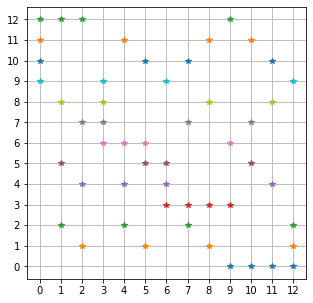

In [10]:
p = 3
L=Doble(p)
import matplotlib.pyplot as plt
import numpy as np
# set figure size
plt.rcParams["figure.figsize"] = (5,5)
#set x and y ticks and labels
ncols = nrows = p*p + p +1
col_labels = range(ncols)
row_labels = range(nrows)
plt.xticks(range(1,ncols+1), col_labels)
plt.yticks(range(nrows), row_labels);
#plt.grid(which = 'minor')
plt.grid(true)
i = 0
for l in L:
    plt.plot(l, np.ones(p+1) * i, '*')
    i = i + 1
plt.savefig('finite3x1.png')

In [11]:
Doble(2) # which is fano plane

Doble game with order  2
Card 1 is [5, 6, 7]
Card 2 is [2, 4, 7]
Card 3 is [3, 4, 5]
Card 4 is [2, 3, 6]
Card 5 is [1, 3, 7]
Card 6 is [1, 4, 6]
Card 7 is [1, 2, 5]


[[5, 6, 7], [2, 4, 7], [3, 4, 5], [2, 3, 6], [1, 3, 7], [1, 4, 6], [1, 2, 5]]

In [12]:
# lets define a finit field with p^n where p is a prime and n is an integer
from sympy import *
from sympy.abc import t
from itertools import *
def finitefield(p, n):
    E = []
    P = []
    T = []
    TT = []
    for i in range(p): 
        P.append(i)
        #E.append(i)
        
    for i in range(n):
        T.append(t ** i)
        TT.append([])
    #print(TT)
    # for every degree of t with a  poosible factor in P
    # then the possible combinations with addition is the field 
    for i in range(n):
        for q in P:
            TT[i].append(q * t ** i)
    #print(TT, tuple(TT))
    #'''   
    ProductSet = product(*TT)
    for pairs in  ProductSet:
        #print(pairs)
        s = 0
        for element in pairs:
            s = s + element
            
        #print(s)
        E.append(s)
    #'''        

    return(E, t**n + t +1, len(E) )
    

In [13]:
from sympy.abc import t
'''
E = [0, 1, t, t**2]
f = 1+t+t**2
q = len(E)
'''

E, f, q = finitefield(2,2)
r = 1
def fCard(a, b, c):
    card = []
    for x in range(0, q):
        for y in range(0, q):
            g = a * E[x] + b * E[y] + c
            # i use try, to set r, rr <> 0 before every loop 
            r = 1
            rr = 1
            m, r = div(g, f, domain='Z')
            #print(a,b,c,m,r)
            if r % 2 == 0:
                card.append(q * x + y + 1)
                #print('yes')
                
            else:
                try:
                    m, rr = div (r, 2, domain='Z')
                except:
                    pass
                #print(a,b,c,m,r,rr)
                if rr == 0:
                    card.append(q * x + y + 1)
                    #print('yes')
    for x in range(0, q):
        r = 1
        rr = 1
        g = a * E[x] + b 
        m, r = div(g, f)
        if r % 2 == 0:
            card.append(q * q + x + 1)
        # 2t + 2  
        else:
            try:
                m, rr = div (r, 2, domain='Z')
                if rr == 0:
                    card.append(q * q + x + 1)
            except:
                pass
    if a==0:
        card.append(q * q + q + 1)
    return card

#'''
for i in range(0, q):
    for j in range(0, q):
        print('Card', i * q + j + 1, 'is', fCard(E[i], E[j], 1))
for i in range(0, q):
    print('Card', q * q + i + 1, 'is', fCard(E[i], 1, 0))
print('Card', q * q + q + 1, 'is', fCard(1, 0, 0))
#'''
#print(fCard(1,1,0))

Card 1 is [17, 18, 19, 20, 21]
Card 2 is [4, 8, 12, 16, 21]
Card 3 is [3, 7, 11, 15, 21]
Card 4 is [2, 6, 10, 14, 21]
Card 5 is [13, 14, 15, 16, 17]
Card 6 is [4, 7, 10, 13, 19]
Card 7 is [3, 6, 12, 13, 20]
Card 8 is [2, 8, 11, 13, 18]
Card 9 is [9, 10, 11, 12, 17]
Card 10 is [4, 6, 9, 15, 18]
Card 11 is [3, 8, 9, 14, 19]
Card 12 is [2, 7, 9, 16, 20]
Card 13 is [5, 6, 7, 8, 17]
Card 14 is [4, 5, 11, 14, 20]
Card 15 is [3, 5, 10, 16, 18]
Card 16 is [2, 5, 12, 15, 19]
Card 17 is [1, 5, 9, 13, 21]
Card 18 is [1, 8, 10, 15, 20]
Card 19 is [1, 6, 11, 16, 19]
Card 20 is [1, 7, 12, 14, 18]
Card 21 is [1, 2, 3, 4, 17]


In [14]:
from sympy.abc import t
E = [0, 1, t, t**2]
f = 1+t+t**2
q = len(E)
r = 1
cards = set()
def Card(a, b, c):
    card = []
    for x in range(0, q):
        for y in range(0, q):
            g = a * E[x] + b * E[y] + c
            # rr = r + 2*t*t since 2*t*t is zero will not efect result 
            if div((div(g, f, domain='Z')[1]+2*t*t), 2, domain='Z')[1] == 0:
                #print(a,m,r,q * x + y + 1)
                card.append(q * x + y + 1)
    for x in range(0, q):
        g = a * E[x] + b 
        if div((div(g, f, domain='Z')[1]+2*t*t), 2, domain='Z')[1] == 0:
            card.append(q * q + x + 1)
            #print(a,m,r,q * q + x + 1)
    if a==0:
        card.append(q * q + q + 1)
        #print(a,m,r,q * q + q + 1)
    return card

#'''
# z <> 0
for i in range(0, q):
    for j in range(0, q):
        C =  Card(E[i], E[j], 1)
        print('Card', i * q + j + 1, 'is', C)
        cards.add(tuple(C))
# z == 0, y <> 0
for i in range(0, q):
    C =  Card(E[i], 1 , 0)
    print('Card', q * q + i + 1, 'is', C)
    cards.add(tuple(C))
# z = y = 0
C = Card(1, 0, 0)
print('Card', q * q + q + 1, 'is', C)
cards.add(tuple(C))
#'''
#print(i * q + q, Card(1,1,0))

Card 1 is [17, 18, 19, 20, 21]
Card 2 is [2, 6, 10, 14, 21]
Card 3 is [4, 8, 12, 16, 21]
Card 4 is [3, 7, 11, 15, 21]
Card 5 is [5, 6, 7, 8, 17]
Card 6 is [2, 5, 12, 15, 18]
Card 7 is [4, 5, 11, 14, 19]
Card 8 is [3, 5, 10, 16, 20]
Card 9 is [13, 14, 15, 16, 17]
Card 10 is [2, 8, 11, 13, 20]
Card 11 is [4, 7, 10, 13, 18]
Card 12 is [3, 6, 12, 13, 19]
Card 13 is [9, 10, 11, 12, 17]
Card 14 is [2, 7, 9, 16, 19]
Card 15 is [4, 6, 9, 15, 20]
Card 16 is [3, 8, 9, 14, 18]
Card 17 is [1, 5, 9, 13, 21]
Card 18 is [1, 6, 11, 16, 18]
Card 19 is [1, 7, 12, 14, 20]
Card 20 is [1, 8, 10, 15, 19]
Card 21 is [1, 2, 3, 4, 17]


In [15]:
#check have and only have one intersection point
import itertools
STW = False
for c1, c2 in itertools.combinations(cards,2):
    if len(set(c1).intersection(set(c2)) )!= 1:
        print(c1,c2,set(c1)-set(c2))
        STW = True
        break
if not STW: print('all cards have and only have one intersection point')
print(len(cards))

all cards have and only have one intersection point
21


In [16]:
'''E = [0, 1, t, 1+t, t**2, 1+t**2, t+t**2, 1+t+t**2]
f = 1+t+t**3
q = len(E)'''
E, f, q = finitefield(2,3)
print(E,f,q)
cards = set()
def Card(a, b, c):
    card = []
    for x in range(0, q):
        for y in range(0, q):
            r = 1
            rr = 1
            g = a * E[x] + b * E[y] + c
            #print(g)
            
        
            #using python % but 2*t % 2 <>0 and div (2, 2) will have error 
            
            #if div((div(g, f)[1] + 2)*t, 2)[1] == 0 :
            m, r = div(g, f, domain= 'Z')
            if r % 2 == 0:
                card.append(q * x + y + 1)
                #print(x,y,r, 'yes')
            else:
                try:
                    m, rr = div(r, 2, domain = 'Z')
                    if rr == 0:
                        card.append(q * x + y + 1)
                        #print(x,y,r,rr,'yes')
                except:
                    pass

    for x in range(0, q):
        g = a * E[x] + b 
        r = 1
        rr = 1
        m, r = div(g, f, domain= 'Z')
        if r % 2 == 0:
            card.append(q * q + x + 1)
            #print(x,y,r, 'yes')
        else:                
            try:
                m, rr = div(r, 2, domain = 'Z')
                if rr == 0:
                    card.append(q * q + x + 1)
            except:
                pass
        
    if a==0:
        card.append(q * q + q + 1)
    return card
#'''
for i in range(0, q):
    for j in range(0, q):
        C = Card(E[i], E[j], 1)
        print('Card', i * q + j + 1, 'is', C)
        cards.add(tuple(C))
for i in range(0, q):
    C = Card(E[i], 1, 0)
    print('Card', q * q + i + 1, 'is', C)
    cards.add(tuple(C))
    C = Card(1, 1, 0)
print('Card', q * q + q + 1, 'is', C)
cards.add(tuple(C))
#'''
#i=0
#j=1
#print(i * q + j + 1, Card(i,j,1))

[0, t**2, t, t**2 + t, 1, t**2 + 1, t + 1, t**2 + t + 1] t**3 + t + 1 8
Card 1 is [65, 66, 67, 68, 69, 70, 71, 72, 73]
Card 2 is [8, 16, 24, 32, 40, 48, 56, 64, 73]
Card 3 is [6, 14, 22, 30, 38, 46, 54, 62, 73]
Card 4 is [7, 15, 23, 31, 39, 47, 55, 63, 73]
Card 5 is [5, 13, 21, 29, 37, 45, 53, 61, 73]
Card 6 is [3, 11, 19, 27, 35, 43, 51, 59, 73]
Card 7 is [4, 12, 20, 28, 36, 44, 52, 60, 73]
Card 8 is [2, 10, 18, 26, 34, 42, 50, 58, 73]
Card 9 is [57, 58, 59, 60, 61, 62, 63, 64, 65]
Card 10 is [8, 15, 22, 29, 36, 43, 50, 57, 69]
Card 11 is [6, 12, 21, 27, 40, 42, 55, 57, 70]
Card 12 is [7, 11, 20, 32, 34, 46, 53, 57, 66]
Card 13 is [5, 16, 19, 26, 38, 47, 52, 57, 72]
Card 14 is [3, 14, 18, 31, 37, 44, 56, 57, 68]
Card 15 is [4, 10, 24, 30, 39, 45, 51, 57, 67]
Card 16 is [2, 13, 23, 28, 35, 48, 54, 57, 71]
Card 17 is [41, 42, 43, 44, 45, 46, 47, 48, 65]
Card 18 is [8, 14, 20, 26, 35, 41, 55, 61, 67]
Card 19 is [6, 13, 24, 31, 34, 41, 52, 59, 69]
Card 20 is [7, 12, 18, 29, 38, 41, 51, 64

In [17]:
E = [0, 1, t, 1+t, t**2, 1+t**2, t+t**2, 1+t+t**2]
f = 1+t+t**3
q = len(E)
'''E, q, f = finitefield(2,3)
print(E,q,f)'''

cards = set()
def Card(a, b, c):
    card = []
    for x in range(0, q):
        for y in range(0, q):
            g = a * E[x] + b * E[y] + c
            r = 1
            rr = 1
            #using python % but 2*t % 2 <>0 and div (2, 2) will have error 
            # i will try add 2 * t**3 at r, since 2*t**3 is zero, it will not effect
            # the result and using poly div to check 
            #if div((div(g, f)[1] + 2)*t, 2)[1] == 0 :
            m, r = div(g, f, domain= 'Z')
            m, rr = div(r + 2*t**3, 2, domain = 'Z')
            if rr == 0:
                card.append(q * x + y + 1)
                 #print(x,y,r,rr,'yes')

    for x in range(0, q):
        g = a * E[x] + b 
        r = 1
        rr = 1
        m, r = div(g, f, domain= 'Z')
        m, rr = div(r + 2*t**3, 2, domain = 'Z')
        if rr == 0:
            card.append(q * q + x + 1)
 
    if a==0:
        card.append(q * q + q + 1)
    return card
#'''
# z <> 0
for i in range(0, q):
    for j in range(0, q):
        C = Card(E[i], E[j], 1)
        print('Card', i * q + j + 1, 'is', C)
        cards.add(tuple(C))

# z = 0, and y <> 0
for i in range(0, q):
    C = Card(E[i], 1, 0)
    print('Card', q * q + i + 1, 'is', C)
    cards.add(tuple(C))

# z = 0 and y = 0
C = Card(1, 0, 0)
print('Card', q * q + q + 1, 'is', C)
cards.add(tuple(C))
#'''
#i=0
#j=1
#print(i * q + j + 1, Card(i,j,1))

Card 1 is [65, 66, 67, 68, 69, 70, 71, 72, 73]
Card 2 is [2, 10, 18, 26, 34, 42, 50, 58, 73]
Card 3 is [6, 14, 22, 30, 38, 46, 54, 62, 73]
Card 4 is [7, 15, 23, 31, 39, 47, 55, 63, 73]
Card 5 is [8, 16, 24, 32, 40, 48, 56, 64, 73]
Card 6 is [3, 11, 19, 27, 35, 43, 51, 59, 73]
Card 7 is [4, 12, 20, 28, 36, 44, 52, 60, 73]
Card 8 is [5, 13, 21, 29, 37, 45, 53, 61, 73]
Card 9 is [9, 10, 11, 12, 13, 14, 15, 16, 65]
Card 10 is [2, 9, 20, 27, 38, 45, 56, 63, 66]
Card 11 is [6, 9, 21, 26, 40, 43, 55, 60, 67]
Card 12 is [7, 9, 18, 32, 36, 46, 53, 59, 68]
Card 13 is [8, 9, 19, 30, 39, 42, 52, 61, 69]
Card 14 is [3, 9, 23, 29, 34, 44, 54, 64, 70]
Card 15 is [4, 9, 22, 31, 37, 48, 51, 58, 71]
Card 16 is [5, 9, 24, 28, 35, 47, 50, 62, 72]
Card 17 is [41, 42, 43, 44, 45, 46, 47, 48, 65]
Card 18 is [2, 12, 22, 32, 35, 41, 55, 61, 70]
Card 19 is [6, 13, 24, 31, 34, 41, 52, 59, 66]
Card 20 is [7, 10, 20, 29, 40, 41, 51, 62, 69]
Card 21 is [8, 11, 23, 28, 38, 41, 53, 58, 67]
Card 22 is [3, 15, 18, 30, 

In [18]:
#check have and only have one intersection point
import itertools
STW = False
for c1, c2 in itertools.combinations(cards,2):
    if len(set(c1).intersection(set(c2)) )!= 1:
        print(c1,c2,set(c1)-set(c2))
        STW = True
        break
if not STW: print('all cards have and only have one intersection point')
print(len(cards))

all cards have and only have one intersection point
73


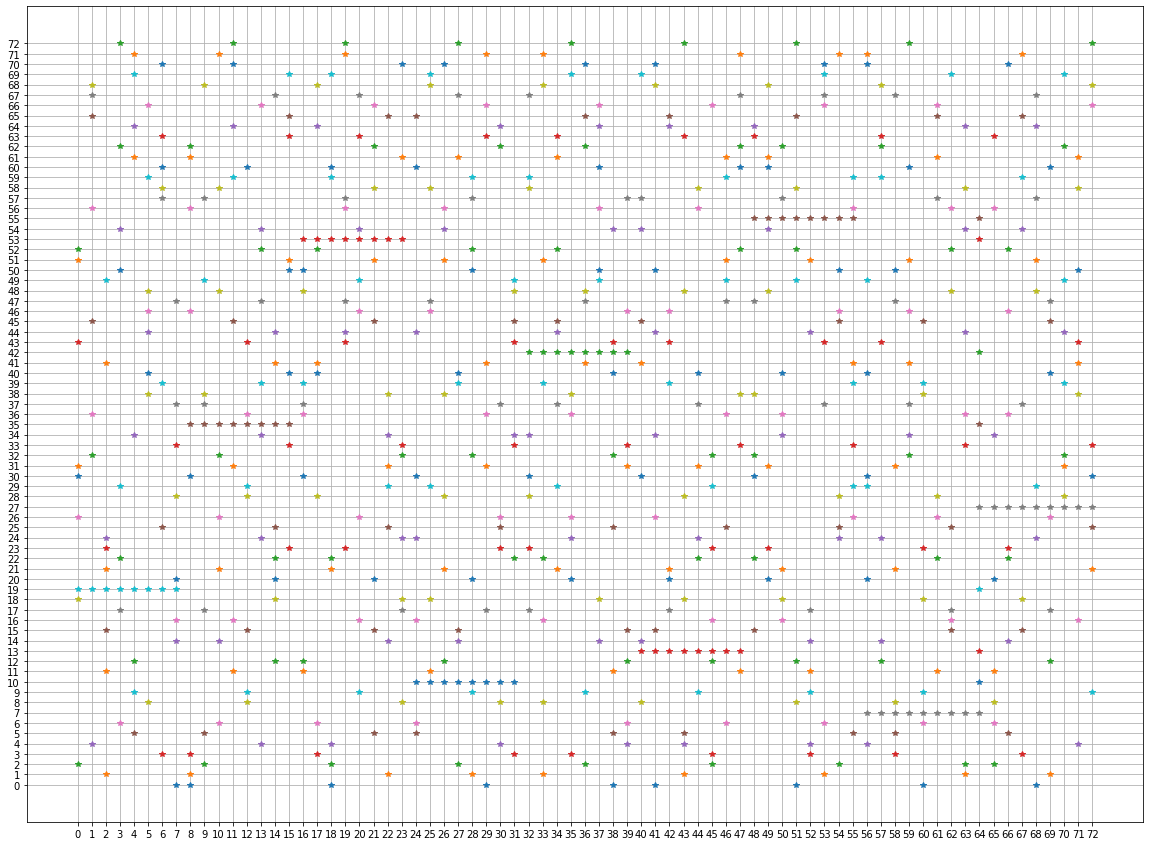

In [19]:
import matplotlib.pyplot as plt   # standard library for plots
import numpy as np
p = 2 ** 3
L = list(cards)
# set figure size
plt.rcParams["figure.figsize"] = (20,15)
#set x and y ticks and labels
ncols = nrows = p*p + p +1
col_labels = range(ncols)
row_labels = range(nrows)
plt.xticks(range(1,ncols+1), col_labels)
plt.yticks(range(nrows), row_labels);
#plt.grid(which = 'minor')
plt.grid(true)
for i in range(len(L)):
    plt.plot(L[i], np.ones(p+1) * i , '*')
plt.savefig('finite2x3.png')

In [20]:
from sympy import *
from sympy.abc import x
from sympy import ZZ
from sympy.polys.galoistools import *
p=2
n=5
gf_irreducible(n, p, ZZ)
#gf_irreducible_p(f, 2, ZZ)
factor(1+x**4+x**5, modulus=2)

(x**2 + x + 1)*(x**3 + x + 1)

Doble game with order  5
Card 1 is [26, 27, 28, 29, 30, 31]
Card 2 is [5, 10, 15, 20, 25, 31]
Card 3 is [3, 8, 13, 18, 23, 31]
Card 4 is [4, 9, 14, 19, 24, 31]
Card 5 is [2, 7, 12, 17, 22, 31]
Card 6 is [21, 22, 23, 24, 25, 26]
Card 7 is [5, 9, 13, 17, 21, 30]
Card 8 is [3, 10, 12, 19, 21, 29]
Card 9 is [4, 7, 15, 18, 21, 28]
Card 10 is [2, 8, 14, 20, 21, 27]
Card 11 is [11, 12, 13, 14, 15, 26]
Card 12 is [5, 8, 11, 19, 22, 28]
Card 13 is [3, 7, 11, 20, 24, 30]
Card 14 is [4, 10, 11, 17, 23, 27]
Card 15 is [2, 9, 11, 18, 25, 29]
Card 16 is [16, 17, 18, 19, 20, 26]
Card 17 is [5, 7, 14, 16, 23, 29]
Card 18 is [3, 9, 15, 16, 22, 27]
Card 19 is [4, 8, 12, 16, 25, 30]
Card 20 is [2, 10, 13, 16, 24, 28]
Card 21 is [6, 7, 8, 9, 10, 26]
Card 22 is [5, 6, 12, 18, 24, 27]
Card 23 is [3, 6, 14, 17, 25, 28]
Card 24 is [4, 6, 13, 20, 22, 29]
Card 25 is [2, 6, 15, 19, 23, 30]
Card 26 is [1, 6, 11, 16, 21, 31]
Card 27 is [1, 10, 14, 18, 22, 30]
Card 28 is [1, 9, 12, 20, 23, 28]
Card 29 is [1, 8, 15,

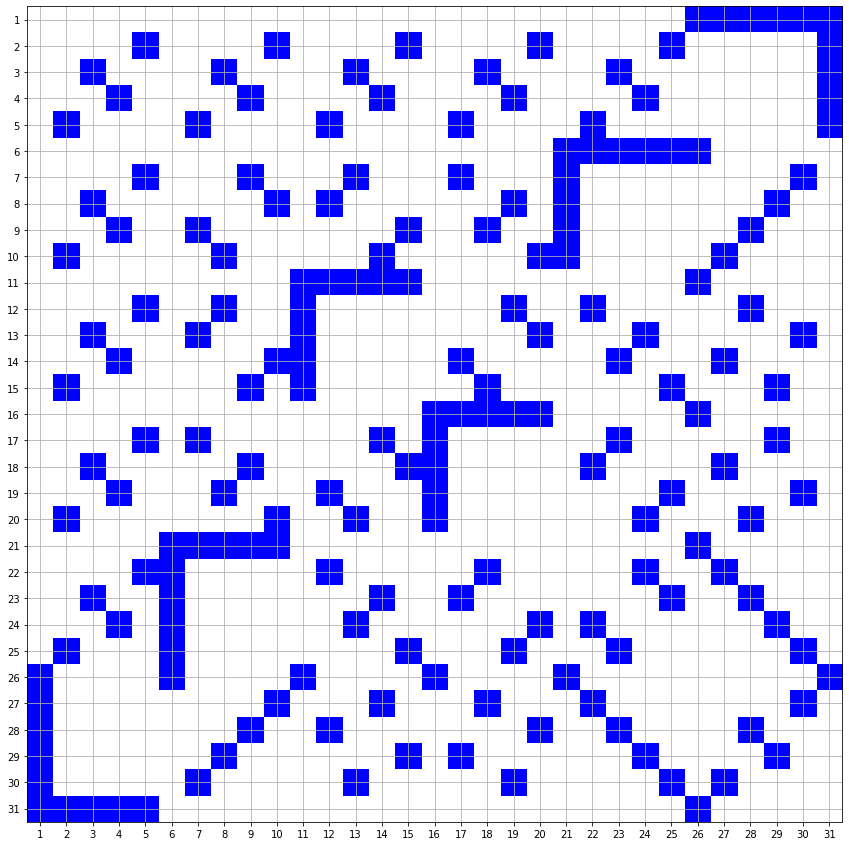

In [154]:
# Define colormap
from matplotlib.colors import ListedColormap

cmapmine = ListedColormap(['w', 'b'], N=2)
p = 5
L=Doble(p)
ncols = nrows = p*p + p +1
game = np.zeros((ncols,nrows))
col_labels = range(1,ncols+1)
row_labels = range(1,nrows+1)
plt.xticks(range(ncols), col_labels)
plt.yticks(range(nrows), row_labels)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=True,         # ticks along the top edge are off
    #labelbottom = True
    labeltop = True
    ) # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=True,      # ticks along the bottom edge are off
    right=True,         # ticks along the top edge are off
    #labelleft=True
    
    labelright=True
    ) # labels along the bottom edge are off

for i in range(len(L)):
    for j in L[i]:
        game[i][j-1] = 1 
    

#plt.grid(which = 'minor')
#plt.xaxis.tick_top()

plt.grid(true)
plt.grid(which = 'minor')
# Plot matrix

#fig, (ax1, ax2) = plt.subplots(1, 2)
#ax1.imshow(game, cmap=cmapmine, vmin=0, vmax=1)
#ax1.set_title('Ones')
#ax2.imshow(game, cmap=cmapmine, vmin=0, vmax=1)
#ax2.set_title('Zeros and Ones')
plt.imshow(game, cmap=cmapmine, vmin=0, vmax=1)
plt.savefig('doble5.png')
plt.show()
